In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
ZHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_0819/Table_4.csv", sep=',', header=0)

samples=np.unique(ZHe.Sample_No)
samples
#ZHe

array(['7315-18', '7315-35', '7315-41', '8010-25'], dtype=object)

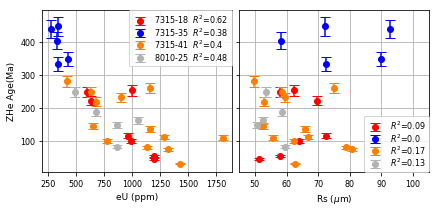

In [3]:
ms=5
lfs=8
lbp=0
lls=0.0001
ls=8
a=1
c=[(1,0,0,a),(0,0,1,a),(1,.5,0,a), (.7,.7,.7,a)] 
    
fig= plt.subplots(2,1, figsize=(15/2.54, 7/2.54))# This size is in inches

plt.subplot(1, 2, 1)
for i in np.arange(0,len(samples),1):
    plt.errorbar(ZHe.eU_ppm[ZHe.Sample_No==samples[i]],
             ZHe.Corrected_Age_Ma[ZHe.Sample_No==samples[i]],
             yerr=ZHe.Corrected_Age_Ma_1s[ZHe.Sample_No==samples[i]],
             label=str(samples[i])+str('  $R^2$=')+
             str(round(scipy.stats.linregress(
             ZHe.eU_ppm[ZHe.Sample_No==samples[i]], 
             ZHe.Corrected_Age_Ma[ZHe.Sample_No==samples[i]])[2]**2,2)),
             fmt='o', c=c[i],capsize=5)
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')

plt.tick_params(axis='both', which='major', labelsize=ls)
plt.grid()
plt.xlabel('eU (ppm)', fontsize=ls+1)
plt.ylabel('ZHe Age(Ma)', fontsize=ls+1)

plt.subplot(1, 2, 2)
for i in np.arange(0,len(samples),1):
    plt.errorbar(ZHe.Rs_um[ZHe.Sample_No==samples[i]],
             ZHe.Corrected_Age_Ma[ZHe.Sample_No==samples[i]],
             yerr=ZHe.Corrected_Age_Ma_1s[ZHe.Sample_No==samples[i]],
             label=str('$R^2$=')+
             str(round(scipy.stats.linregress(
             ZHe.Rs_um[ZHe.Sample_No==samples[i]], 
             ZHe.Corrected_Age_Ma[ZHe.Sample_No==samples[i]])[2]**2,2)),
             fmt='o', c=c[i],capsize=5)
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='best')
plt.xlim(45,105)
plt.tick_params(axis='y', which='major', labelsize=ls, labelleft=False)
plt.tick_params(axis='x', which='major', labelsize=ls)

plt.grid()
plt.xlabel('Rs ($\mu$m)', fontsize=ls+1)


plt.tight_layout(pad=0.0)
plt.savefig("./ZHeAge_vs_eU_vs_Rs.pdf", dpi=300)
